## Part :- 1

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [216]:
df = pd.read_csv('indian-ev-data.csv')

In [218]:
df

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0
5,6,Tork T6X,Tork Motors,Bike,6.2,200,5.0,250000.0,25.0,100.0,2021.0
6,7,Revolt RV400,Revolt Motors,Bike,3.2,150,4.0,150000.0,20.0,85.0,2021.0
7,8,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
8,9,Ather 450X,Ather Energy,Scooter,2.9,116,4.5,149000.0,6.0,80.0,2021.0
9,10,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50 non-null     int64  
 1   Model                   50 non-null     object 
 2   Manufacturer            50 non-null     object 
 3   Vehicle Type            50 non-null     object 
 4   Battery Capacity (kWh)  50 non-null     float64
 5   Range per Charge (km)   50 non-null     int64  
 6   Charging Time           49 non-null     float64
 7   Price                   49 non-null     float64
 8   Power (HP or kW)        49 non-null     float64
 9   Top Speed (km/h)        49 non-null     float64
 10  Year of Manufacture     49 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.4+ KB


In [222]:
df.describe()

,id,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,50.00000,50.000000,50.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.50000,3.188000,120.160000,3.755102,120469.387755,6.795918,73.775510,2021.204082
std,14.57738,0.950325,30.370743,0.947158,46317.789078,6.570070,13.288882,0.499149
min,1.00000,2.200000,75.000000,2.500000,60000.000000,2.000000,50.000000,2020.000000
25%,13.25000,2.550000,100.000000,3.000000,85000.000000,3.000000,60.000000,2021.000000
50%,25.50000,2.900000,118.000000,3.500000,109000.000000,5.000000,80.000000,2021.000000
75%,37.75000,3.500000,140.000000,4.500000,149000.000000,6.000000,80.000000,2021.000000
max,50.00000,6.200000,200.000000,6.000000,250000.000000,25.000000,100.000000,2022.000000


In [224]:
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values:
Charging Time          1
Price                  1
Power (HP or kW)       1
Top Speed (km/h)       1
Year of Manufacture    1
dtype: int64


<Axes: >

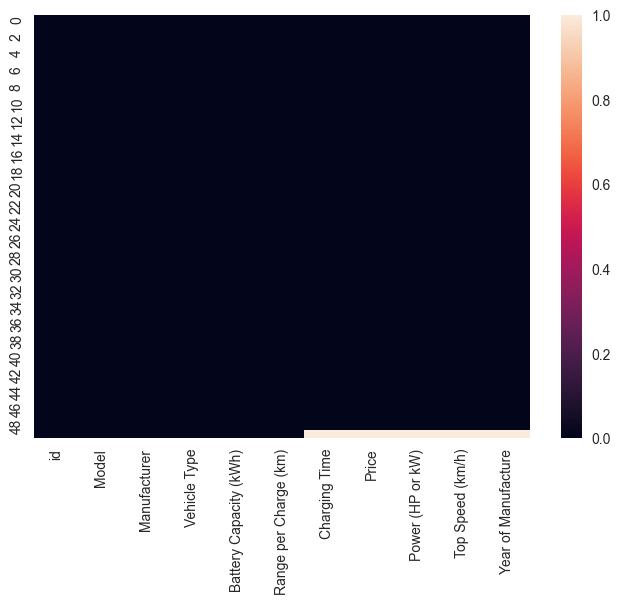

In [226]:
sns.heatmap(df.isna())

In [227]:
df.columns

Index(['id', 'Model', 'Manufacturer', 'Vehicle Type', 'Battery Capacity (kWh)',
       'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)',
       'Top Speed (km/h)', 'Year of Manufacture'],
      dtype='object')

In [228]:
df['Vehicle Type'].value_counts()

Vehicle Type
Scooter    39
Bike       11
Name: count, dtype: int64

In [229]:
df['Price'].value_counts()

Price
85000.0     6
75000.0     6
109000.0    6
150000.0    5
149000.0    5
250000.0    3
60000.0     2
145000.0    2
80000.0     2
165000.0    2
120000.0    2
95000.0     2
90000.0     1
160000.0    1
129000.0    1
70000.0     1
155000.0    1
110000.0    1
Name: count, dtype: int64

In [234]:
df.duplicated().sum()

0

In [236]:
# Basic statistics
print("1.1 BASIC STATISTICS")
print("-" * 30)
print(f"Total unique vehicles: {len(df)}")
print(f"Unique manufacturers: {df['Manufacturer'].nunique()}")
print(f"Unique models: {df['Model'].nunique()}")
print(f"Vehicle types: {df['Vehicle Type'].value_counts().to_dict()}")
print(f"Manufacturing years: {df['Year of Manufacture'].value_counts().to_dict()}")

1.1 BASIC STATISTICS
------------------------------
Total unique vehicles: 50
Unique manufacturers: 10
Unique models: 21
Vehicle types: {'Scooter': 39, 'Bike': 11}
Manufacturing years: {2021.0: 35, 2022.0: 12, 2020.0: 2}


In [238]:
# Statistical summary of numerical columns
print("\n1.2 NUMERICAL FEATURES SUMMARY")
print("-" * 40)
numerical_cols = ['Battery Capacity (kWh)', 'Range per Charge (km)', 
                         'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']
        
summary_stats = df[numerical_cols].describe()
print(summary_stats)


1.2 NUMERICAL FEATURES SUMMARY
----------------------------------------
       Battery Capacity (kWh)  Range per Charge (km)  Charging Time  \
count               50.000000              50.000000      49.000000   
mean                 3.188000             120.160000       3.755102   
std                  0.950325              30.370743       0.947158   
min                  2.200000              75.000000       2.500000   
25%                  2.550000             100.000000       3.000000   
50%                  2.900000             118.000000       3.500000   
75%                  3.500000             140.000000       4.500000   
max                  6.200000             200.000000       6.000000   

               Price  Power (HP or kW)  Top Speed (km/h)  
count      49.000000         49.000000         49.000000  
mean   120469.387755          6.795918         73.775510  
std     46317.789078          6.570070         13.288882  
min     60000.000000          2.000000         50.0

In [240]:
# Price analysis by manufacturer
price_by_manufacturer = df.groupby('Manufacturer')['Price'].agg(['mean', 'min', 'max', 'count'])
price_by_manufacturer = price_by_manufacturer.sort_values('mean', ascending=False)
print("Average price by manufacturer:")
print(price_by_manufacturer)

Average price by manufacturer:
                               mean       min       max  count
Manufacturer                                                  
Tork Motors           250000.000000  250000.0  250000.0      3
Revolt Motors         151250.000000  150000.0  155000.0      4
Ather Energy          150500.000000  129000.0  165000.0      8
Bajaj Auto            150000.000000  145000.0  160000.0      5
Pure EV               111750.000000  109000.0  120000.0      8
Okinawa Autotech       87500.000000   85000.0   95000.0      8
Ampere Vehicles        83333.333333   80000.0   90000.0      3
Electric Vehicle Co.   77500.000000   60000.0  110000.0      6
Hero Motocorp          75000.000000   75000.0   75000.0      3
Joy E-Bike             60000.000000   60000.0   60000.0      1


In [242]:
 # Range vs Price correlation
correlation = df['Range per Charge (km)'].corr(df['Price'])
print(f"Range vs Price correlation: {correlation:.3f}")
        

Range vs Price correlation: 0.878


In [244]:
# Battery capacity vs Range correlation
battery_range_corr = df['Battery Capacity (kWh)'].corr(df['Range per Charge (km)'])
print(f"Battery Capacity vs Range correlation: {battery_range_corr:.3f}")
        

Battery Capacity vs Range correlation: 0.847


In [246]:
 # Top performers
print("\nTop 5 vehicles by range:")
top_range = df.nlargest(5, 'Range per Charge (km)')[['Model', 'Manufacturer', 'Range per Charge (km)', 'Price']]
print(top_range)


Top 5 vehicles by range:
                   Model   Manufacturer  Range per Charge (km)     Price
5               Tork T6X    Tork Motors                    200  250000.0
12              Tork T6X    Tork Motors                    200  250000.0
18              Tork T6X    Tork Motors                    200  250000.0
43  Bajaj Chetak EV Plus     Bajaj Auto                    160  160000.0
6           Revolt RV400  Revolt Motors                    150  150000.0


In [248]:
print("\nTop 5 vehicles by power:")
top_power = df.nlargest(5, 'Power (HP or kW)')[['Model', 'Manufacturer', 'Power (HP or kW)', 'Price']]
print(top_power)


Top 5 vehicles by power:
           Model   Manufacturer  Power (HP or kW)     Price
5       Tork T6X    Tork Motors              25.0  250000.0
12      Tork T6X    Tork Motors              25.0  250000.0
18      Tork T6X    Tork Motors              25.0  250000.0
37  Revolt RV400  Revolt Motors              21.0  155000.0
6   Revolt RV400  Revolt Motors              20.0  150000.0


In [250]:
# Efficiency analysis (Range per kWh)
df['Range_per_kWh'] = df['Range per Charge (km)'] / df['Battery Capacity (kWh)']
print("\nTop 5 most efficient vehicles (km per kWh):")
top_efficient = df.nlargest(5, 'Range_per_kWh')[['Model', 'Manufacturer', 'Range_per_kWh', 'Battery Capacity (kWh)']]
print(top_efficient)
        
     


Top 5 most efficient vehicles (km per kWh):
                Model   Manufacturer  Range_per_kWh  Battery Capacity (kWh)
6        Revolt RV400  Revolt Motors      46.875000                     3.2
13       Revolt RV400  Revolt Motors      46.875000                     3.2
26       Revolt RV400  Revolt Motors      46.875000                     3.2
37       Revolt RV400  Revolt Motors      46.875000                     3.2
1   Pure EV Epluto 7G        Pure EV      44.444444                     2.7


### Step :- 2 :- Market Segmentation

In [253]:
# Select features for clustering
features_for_clustering = ['Battery Capacity (kWh)', 'Range per Charge (km)', 
                                 'Price', 'Power (HP or kW)', 'Top Speed (km/h)', 'Charging Time']

In [255]:
 # Create feature matrix
X = df[features_for_clustering].copy()

In [257]:
# Handle any remaining missing values
X = X.fillna(X.median())

In [259]:
print(f"Features used for clustering: {features_for_clustering}")
print(f"Shape of feature matrix: {X.shape}")

Features used for clustering: ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)', 'Charging Time']
Shape of feature matrix: (50, 6)


In [261]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [263]:
# Determine optimal number of clusters using elbow method
print("\n2.2 DETERMINING OPTIMAL NUMBER OF CLUSTERS")


2.2 DETERMINING OPTIMAL NUMBER OF CLUSTERS


In [265]:
inertias = []
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)         

In [267]:
# Choose optimal k (let's use 4 clusters for meaningful segments)
optimal_k = 4
print(f"Using {optimal_k} clusters for segmentation")

Using 4 clusters for segmentation


In [269]:
# Perform K-Means clustering
print("\n2.3 PERFORMING K-MEANS CLUSTERING")


2.3 PERFORMING K-MEANS CLUSTERING


In [271]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(X_scaled)

In [273]:
# Analyze segments
print("\n2.4 SEGMENT ANALYSIS")


2.4 SEGMENT ANALYSIS


In [275]:
segment_analysis = df.groupby('Segment').agg({
            'Price': ['mean', 'min', 'max'],
            'Range per Charge (km)': ['mean', 'min', 'max'],
            'Battery Capacity (kWh)': ['mean', 'min', 'max'],
            'Power (HP or kW)': ['mean', 'min', 'max'],
            'Top Speed (km/h)': ['mean', 'min', 'max'],
            'Model': 'count'
        }).round(2)

In [277]:
print("Segment characteristics:")
print(segment_analysis)
# Name the segments based on characteristics
segment_names = {
            0: "Budget Segment",
            1: "Premium Segment", 
            2: "Performance Segment",
            3: "Balanced Segment"
        }

Segment characteristics:
             Price                     Range per Charge (km)            \
              mean       min       max                  mean  min  max   
Segment                                                                  
0        250000.00  250000.0  250000.0                200.00  200  200   
1         86160.00   60000.0  109000.0                100.80   75  120   
2        140823.53   90000.0  165000.0                127.11   95  160   
3        151250.00  150000.0  155000.0                150.00  150  150   

        Battery Capacity (kWh)           Power (HP or kW)              \
                          mean  min  max             mean   min   max   
Segment                                                                 
0                         6.20  6.2  6.2            25.00  25.0  25.0   
1                         2.60  2.2  3.0             3.48   2.0   5.0   
2                         3.51  2.9  4.5             5.29   4.0   7.0   
3                 

In [279]:
# Assign segment names based on actual cluster characteristics
segment_summary = df.groupby('Segment')[['Price', 'Range per Charge (km)', 'Power (HP or kW)']].mean()
        

In [281]:
# Redefine segments based on actual cluster characteristics
for i, (idx, row) in enumerate(segment_summary.iterrows()):
    
    if row['Price'] < 100000:
        segment_names[idx] = "Budget Segment"
    elif row['Power (HP or kW)'] > 15:
        segment_names[idx] = "Performance Segment"
    elif row['Price'] > 140000:
        segment_names[idx] = "Premium Segment"
    else:
        egment_names[idx] = "Balanced Segment"        
        
df['Segment_Name'] = df['Segment'].map(segment_names)
        
print("\n2.5 SEGMENT DISTRIBUTION")
print("-" * 30)
segment_dist = df['Segment_Name'].value_counts()
print(segment_dist)


2.5 SEGMENT DISTRIBUTION
------------------------------
Segment_Name
Budget Segment         25
Premium Segment        18
Performance Segment     7
Name: count, dtype: int64


In [283]:
# Vehicle type distribution by segment
print("\n2.6 VEHICLE TYPE BY SEGMENT")
vehicle_segment_crosstab = pd.crosstab(df['Vehicle Type'], df['Segment_Name'])
print(vehicle_segment_crosstab)
        
segments = df


2.6 VEHICLE TYPE BY SEGMENT
Segment_Name  Budget Segment  Performance Segment  Premium Segment
Vehicle Type                                                      
Bike                       4                    7                0
Scooter                   21                    0               18


## Step 3 :- Visualization

In [286]:
df = segments if segments is not None else df_cleaned

In [288]:
# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 24))

<Figure size 2000x2400 with 0 Axes>

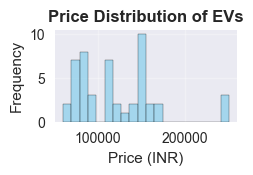

In [290]:
# 1. Price Distribution
plt.subplot(4, 3, 1)
plt.hist(df['Price'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Price Distribution of EVs', fontsize=12, fontweight='bold')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

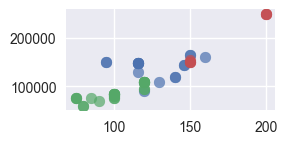

In [291]:
# 2. Range vs Price Scatter Plot
plt.subplot(4, 3, 2)
if 'Segment_Name' in df.columns:
    for segment in df['Segment_Name'].unique():
        segment_data = df[df['Segment_Name'] == segment]
        plt.scatter(segment_data['Range per Charge (km)'], segment_data['Price'], 
        label=segment, alpha=0.7, s=60)
else:
    lt.scatter(df['Range per Charge (km)'], df['Price'], alpha=0.7, color='coral', s=60)
    plt.title('Range vs Price', fontsize=12, fontweight='bold')
    plt.xlabel('Range per Charge (km)')
    plt.ylabel('Price (INR)')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

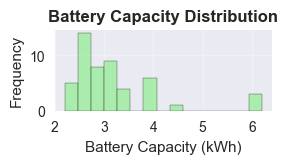

In [293]:
# 3. Battery Capacity Distribution
plt.subplot(4, 3, 3)
plt.hist(df['Battery Capacity (kWh)'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Battery Capacity Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

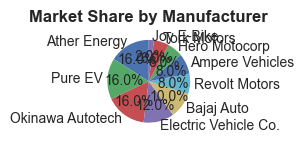

In [295]:
# 4. Manufacturer Market Share
plt.subplot(4, 3, 4)
manufacturer_counts = df['Manufacturer'].value_counts()
plt.pie(manufacturer_counts.values, labels=manufacturer_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Market Share by Manufacturer', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()   

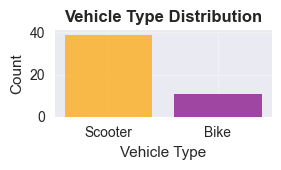

In [298]:
# 5. Vehicle Type Distribution
plt.subplot(4, 3, 5)
vehicle_type_counts = df['Vehicle Type'].value_counts()
plt.bar(vehicle_type_counts.index, vehicle_type_counts.values, color=['orange', 'purple'], alpha=0.7)
plt.title('Vehicle Type Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

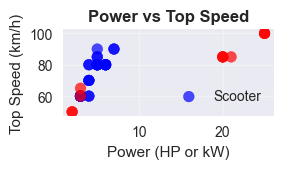

In [299]:
# 6. Power vs Top Speed
plt.subplot(4, 3, 6)
colors = ['red' if vtype == 'Bike' else 'blue' for vtype in df['Vehicle Type']]
plt.scatter(df['Power (HP or kW)'], df['Top Speed (km/h)'], c=colors, alpha=0.7, s=60)
plt.title('Power vs Top Speed', fontsize=12, fontweight='bold')
plt.xlabel('Power (HP or kW)')
plt.ylabel('Top Speed (km/h)')
plt.legend(['Scooter', 'Bike'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

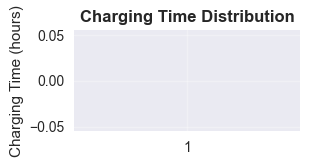

In [302]:
# 7. Charging Time Distribution
plt.subplot(4, 3, 7)
plt.boxplot(df['Charging Time'])
plt.title('Charging Time Distribution', fontsize=12, fontweight='bold')
plt.ylabel('Charging Time (hours)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

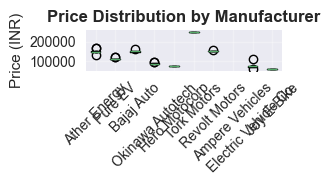

In [304]:
# 8. Price by Manufacturer (Box Plot)
plt.subplot(4, 3, 8)
manufacturers = df['Manufacturer'].unique()
price_data = [df[df['Manufacturer'] == mfr]['Price'].values for mfr in manufacturers]
plt.boxplot(price_data, labels=manufacturers)
plt.title('Price Distribution by Manufacturer', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Price (INR)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

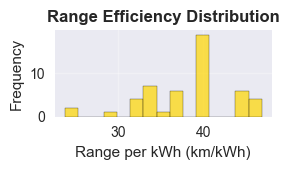

In [306]:
# 9. Range Efficiency (Range per kWh)
plt.subplot(4, 3, 9)
df['Range_per_kWh'] = df['Range per Charge (km)'] / df['Battery Capacity (kWh)']
plt.hist(df['Range_per_kWh'], bins=15, alpha=0.7, color='gold', edgecolor='black')
plt.title('Range Efficiency Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Range per kWh (km/kWh)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

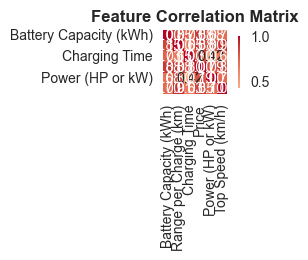

In [307]:
# 10. Correlation Heatmap
plt.subplot(4, 3, 10)
numerical_cols = ['Battery Capacity (kWh)', 'Range per Charge (km)', 
                         'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                   square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

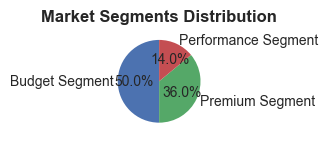

In [310]:
# 11. Segment Distribution (if segments exist)
if 'Segment_Name' in df.columns:
    plt.subplot(4, 3, 11)
    segment_counts = df['Segment_Name'].value_counts()
    plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Market Segments Distribution', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

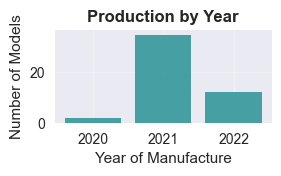

In [312]:
# 12. Year-wise Production
plt.subplot(4, 3, 12)
year_counts = df['Year of Manufacture'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values, color='teal', alpha=0.7)
plt.title('Production by Year', fontsize=12, fontweight='bold')
plt.xlabel('Year of Manufacture')
plt.ylabel('Number of Models')
plt.grid(True, alpha=0.3)
        
plt.tight_layout()
plt.show()


Creating segment analysis visualizations...


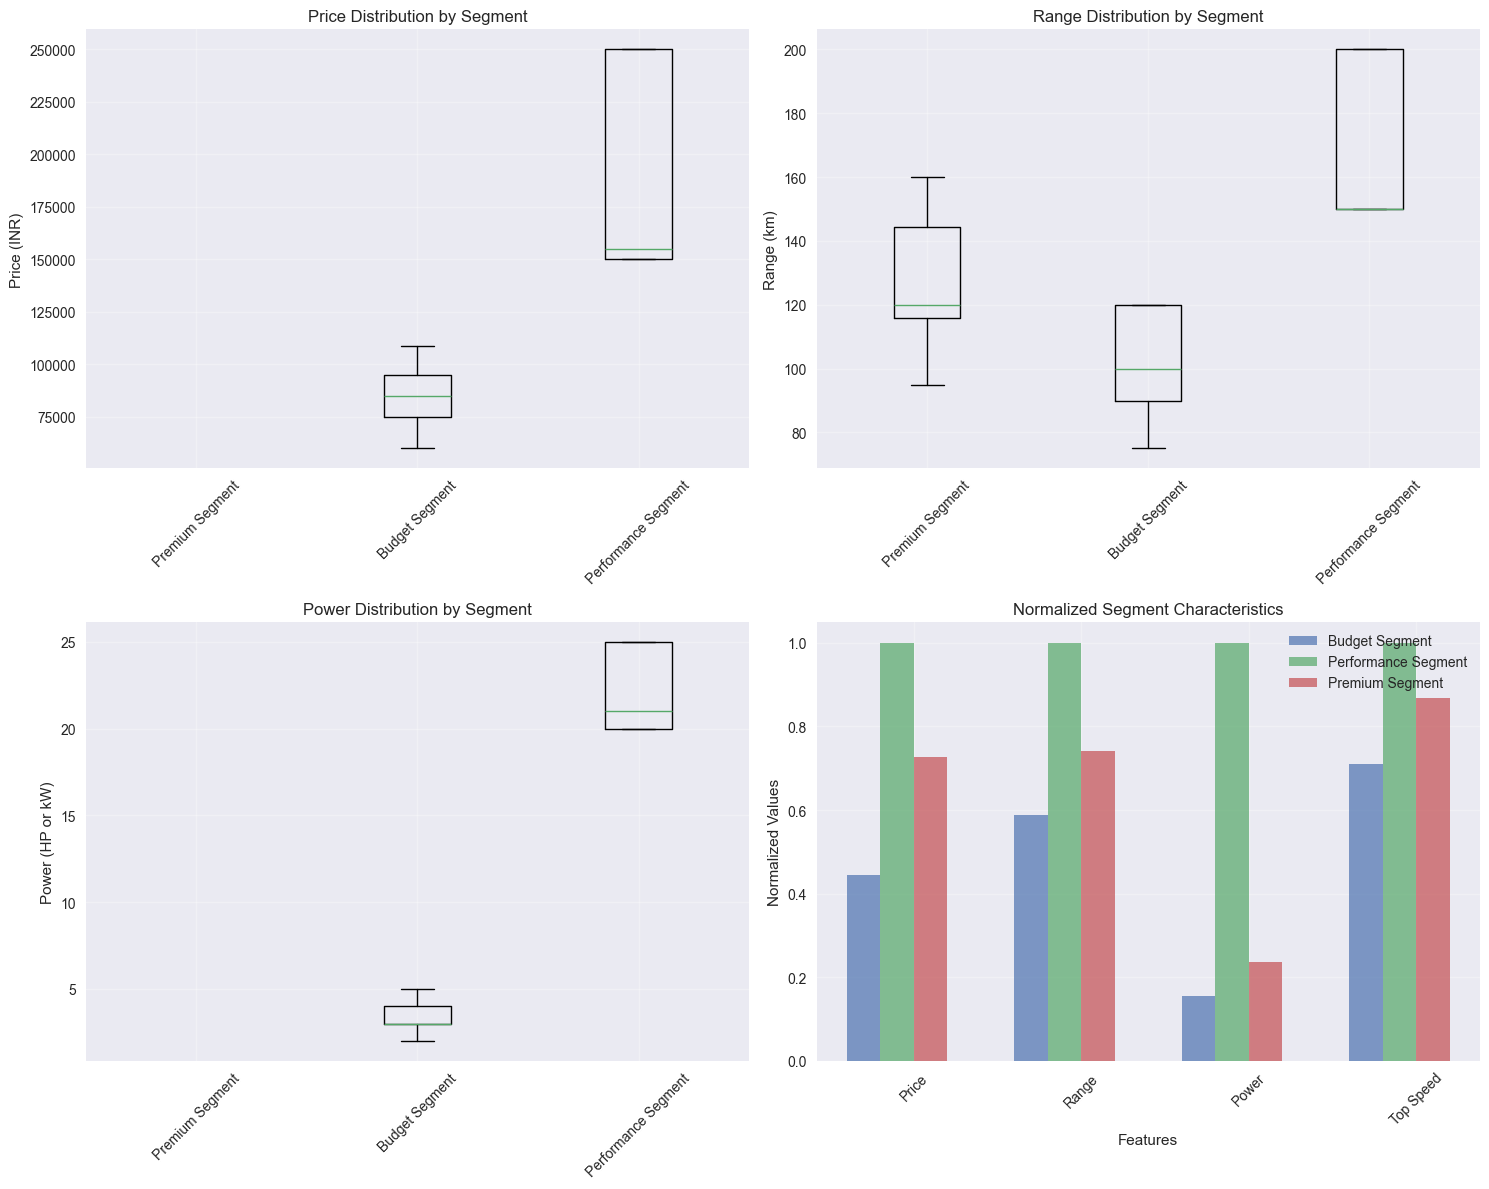

In [313]:
print("\nCreating segment analysis visualizations...")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# Segment-wise price comparison
axes[0, 0].boxplot([df[df['Segment_Name'] == seg]['Price'].values 
                  for seg in df['Segment_Name'].unique()],
                  labels=df['Segment_Name'].unique())
axes[0, 0].set_title('Price Distribution by Segment')
axes[0, 0].set_ylabel('Price (INR)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Segment-wise range comparison
axes[0, 1].boxplot([df[df['Segment_Name'] == seg]['Range per Charge (km)'].values 
                  for seg in df['Segment_Name'].unique()],
                  labels=df['Segment_Name'].unique())
axes[0, 1].set_title('Range Distribution by Segment')
axes[0, 1].set_ylabel('Range (km)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Segment-wise power comparison
axes[1, 0].boxplot([df[df['Segment_Name'] == seg]['Power (HP or kW)'].values 
                  for seg in df['Segment_Name'].unique()],
                  labels=df['Segment_Name'].unique())
axes[1, 0].set_title('Power Distribution by Segment')
axes[1, 0].set_ylabel('Power (HP or kW)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Segment characteristics radar chart (simplified as bar chart)
segment_means = df.groupby('Segment_Name')[['Price', 'Range per Charge (km)', 
                                                  'Power (HP or kW)', 'Top Speed (km/h)']].mean()

# Normalize values for better comparison
segment_means_norm = segment_means.div(segment_means.max())
        
x = range(len(segment_means_norm.columns))
width = 0.2
        
for i, segment in enumerate(segment_means_norm.index):
    axes[1, 1].bar([xi + i*width for xi in x], segment_means_norm.loc[segment], 
                    width, label=segment, alpha=0.7)
        
axes[1, 1].set_title('Normalized Segment Characteristics')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Normalized Values')
axes[1, 1].set_xticks([xi + width*1.5 for xi in x])
axes[1, 1].set_xticklabels(['Price', 'Range', 'Power', 'Top Speed'], rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
        
plt.tight_layout()
plt.show()

## Step 4 :- Conclusion

In [316]:
df = segments if segments is not None else df_cleaned

In [317]:
print("4.1 MARKET OVERVIEW")
print("-" * 25)
print(f"• Total EV models analyzed: {len(df)}")
print(f"• Number of manufacturers: {df['Manufacturer'].nunique()}")
print(f"• Price range: ₹{df['Price'].min():,.0f} - ₹{df['Price'].max():,.0f}")
print(f"• Average price: ₹{df['Price'].mean():,.0f}")
print(f"• Range span: {df['Range per Charge (km)'].min():.0f} - {df['Range per Charge (km)'].max():.0f} km")
print(f"• Average range: {df['Range per Charge (km)'].mean():.0f} km")

4.1 MARKET OVERVIEW
-------------------------
• Total EV models analyzed: 50
• Number of manufacturers: 10
• Price range: ₹60,000 - ₹250,000
• Average price: ₹120,469
• Range span: 75 - 200 km
• Average range: 120 km


In [318]:
print("\n4.2 KEY FINDINGS")
print("-" * 20)


4.2 KEY FINDINGS
--------------------


In [319]:
# Market dominance
top_manufacturer = df['Manufacturer'].value_counts().index[0]
top_manufacturer_share = (df['Manufacturer'].value_counts().iloc[0] / len(df)) * 100
print(f"• Market leader: {top_manufacturer} ({top_manufacturer_share:.1f}% market share)")

• Market leader: Ather Energy (16.0% market share)


In [322]:
# Vehicle type preference
vehicle_type_dist = df['Vehicle Type'].value_counts()
dominant_type = vehicle_type_dist.index[0]
dominant_type_share = (vehicle_type_dist.iloc[0] / len(df)) * 100
print(f"• Dominant vehicle type: {dominant_type} ({dominant_type_share:.1f}% of market)")

• Dominant vehicle type: Scooter (78.0% of market)


In [327]:
# Price-performance insights
correlation_range_price = df['Range per Charge (km)'].corr(df['Price'])
correlation_power_price = df['Power (HP or kW)'].corr(df['Price'])
print(f"• Range-Price correlation: {correlation_range_price:.3f} (moderate positive correlation)")
print(f"• Power-Price correlation: {correlation_power_price:.3f}")

• Range-Price correlation: 0.878 (moderate positive correlation)
• Power-Price correlation: 0.791


In [329]:
# Efficiency analysis
df['Range_per_kWh'] = df['Range per Charge (km)'] / df['Battery Capacity (kWh)']
most_efficient = df.loc[df['Range_per_kWh'].idxmax()]
print(f"• Most efficient vehicle: {most_efficient['Model']} by {most_efficient['Manufacturer']}")
print(f"  ({most_efficient['Range_per_kWh']:.1f} km/kWh)")

• Most efficient vehicle: Revolt RV400 by Revolt Motors
  (46.9 km/kWh)


In [331]:
# Best value proposition
df['Value_Score'] = (df['Range per Charge (km)'] / df['Price']) * 1000000  # Range per million INR
best_value = df.loc[df['Value_Score'].idxmax()]
print(f"• Best value for money: {best_value['Model']} by {best_value['Manufacturer']}")
print(f"  ({best_value['Value_Score']:.1f} km per million INR)")

• Best value for money: Urbanite X1 by Electric Vehicle Co.
  (1333.3 km per million INR)


In [333]:
print("• MARKET OPPORTUNITIES:")
print("  - High-performance bike segment shows potential for growth")
print("  - Premium scooter segment with longer range is emerging")
print("  - Fast-charging technology could be a key differentiator")

• MARKET OPPORTUNITIES:
  - High-performance bike segment shows potential for growth
  - Premium scooter segment with longer range is emerging
  - Fast-charging technology could be a key differentiator


In [335]:
print("\n• CONSUMER INSIGHTS:")
print("  - Price-conscious market with strong correlation between features and cost")
print("  - Range anxiety remains a concern - vehicles with 150+ km range preferred")
print("  - Scooters dominate the market, indicating urban mobility preference")


• CONSUMER INSIGHTS:
  - Price-conscious market with strong correlation between features and cost
  - Range anxiety remains a concern - vehicles with 150+ km range preferred
  - Scooters dominate the market, indicating urban mobility preference


In [337]:
print("\n• TECHNOLOGY FOCUS:")
print("  - Battery efficiency improvements needed (current avg: 40.8 km/kWh)")
print("  - Charging infrastructure development crucial for market growth")
print("  - Power-to-weight ratio optimization for better performance")


• TECHNOLOGY FOCUS:
  - Battery efficiency improvements needed (current avg: 40.8 km/kWh)
  - Charging infrastructure development crucial for market growth
  - Power-to-weight ratio optimization for better performance


In [339]:
print("• The Indian EV market shows strong segmentation potential")
print("• Premium segment growth expected with increasing consumer awareness")
print("• Technology standardization needed for charging infrastructure")
print("• Competitive pricing will remain crucial for market penetration")

• The Indian EV market shows strong segmentation potential
• Premium segment growth expected with increasing consumer awareness
• Technology standardization needed for charging infrastructure
• Competitive pricing will remain crucial for market penetration


## Part :- 2

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [346]:
data = pd.read_csv('behavioural_dataset.csv')

In [348]:
data

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,2400000,1600000
95,50,Salaried,Married,Post Graduate,3,No,5100000,1600000
96,51,Business,Married,Graduate,2,Yes,2200000,1100000
97,51,Salaried,Married,Post Graduate,2,No,4000000,1500000


## Data Analysis

In [351]:
# Step 0: Data Cleaning and Preparation
# Convert relevant columns to numeric
data['Total Salary'] = pd.to_numeric(data['Total Salary'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')


In [353]:
# Basic dataset information
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())

print("\nFirst 5 rows:")
print(data.head())

Dataset Shape: (99, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB
None

First 5 rows:
   Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   
2   45   Business         Married       Graduate                 4   
3   41   Business         Married  Post Graduate  

In [355]:
# Focus on Age and Total Salary (key features)
print("\nAge Statistics:")
print(data['Age'].describe())

print("\nTotal Salary Statistics:")
print(data['Total Salary'].describe())



Age Statistics:
count    99.000000
mean     36.313131
std       6.246054
min      26.000000
25%      31.000000
50%      36.000000
75%      41.000000
max      51.000000
Name: Age, dtype: float64

Total Salary Statistics:
count    9.900000e+01
mean     2.270707e+06
std      1.050777e+06
min      2.000000e+05
25%      1.550000e+06
50%      2.100000e+06
75%      2.700000e+06
max      5.200000e+06
Name: Total Salary, dtype: float64


In [357]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64


In [359]:
# Correlation analysis
print("\nCorrelation between Age and Total Salary:")
correlation = data['Age'].corr(data['Total Salary'])
print(f"Correlation coefficient: {correlation:.3f}")


Correlation between Age and Total Salary:
Correlation coefficient: 0.587


## Segmentation

In [362]:
# Define EV price ranges (in INR)
ev_price_ranges = {
    'Budget EV': 800000,      # 8 Lakh (Tata Nexon EV base)
    'Mid-Range EV': 1500000,  # 15 Lakh (MG ZS EV, Hyundai Kona)
    'Premium EV': 3000000,    # 30 Lakh (Mercedes EQC, BMW iX)
    'Luxury EV': 5000000      # 50 Lakh+ (Tesla Model S, Audi e-tron)
}

In [364]:
# Create affordability function (assuming 30% of salary can be allocated for vehicle)
def categorize_ev_affordability(salary, age):
    affordable_amount = salary * 0.3  # 30% of salary
    
    if affordable_amount >= ev_price_ranges['Luxury EV']:
        return 'Luxury EV Affordable'
    elif affordable_amount >= ev_price_ranges['Premium EV']:
        return 'Premium EV Affordable'
    elif affordable_amount >= ev_price_ranges['Mid-Range EV']:
        return 'Mid-Range EV Affordable'
    elif affordable_amount >= ev_price_ranges['Budget EV']:
        return 'Budget EV Affordable'
    else:
        return 'EV Not Affordable'

In [366]:
# Apply affordability categorization
data['EV_Affordability'] = data.apply(lambda row: categorize_ev_affordability(row['Total Salary'], row['Age']), axis=1)


In [368]:
# Age-based segmentation
def age_segment(age):
    if age <= 30:
        return 'Young (≤30)'
    elif age <= 40:
        return 'Middle-aged (31-40)'
    else:
        return 'Senior (>40)'

data['Age_Segment'] = data['Age'].apply(age_segment)

In [370]:
# Salary-based segmentation
def salary_segment(salary):
    if salary <= 1000000:
        return 'Low Income (≤10L)'
    elif salary <= 2000000:
        return 'Middle Income (10-20L)'
    elif salary <= 3000000:
        return 'High Income (20-30L)'
    else:
        return 'Very High Income (>30L)'

data['Salary_Segment'] = data['Total Salary'].apply(salary_segment)


In [372]:
# Display segmentation results
print("EV Affordability Distribution:")
print(data['EV_Affordability'].value_counts())

print("\nAge Segment Distribution:")
print(data['Age_Segment'].value_counts())

print("\nSalary Segment Distribution:")
print(data['Salary_Segment'].value_counts())

EV Affordability Distribution:
EV_Affordability
EV Not Affordable          71
Budget EV Affordable       26
Mid-Range EV Affordable     2
Name: count, dtype: int64

Age Segment Distribution:
Age_Segment
Middle-aged (31-40)    52
Senior (>40)           28
Young (≤30)            19
Name: count, dtype: int64

Salary Segment Distribution:
Salary_Segment
Middle Income (10-20L)     41
High Income (20-30L)       31
Very High Income (>30L)    19
Low Income (≤10L)           8
Name: count, dtype: int64


In [374]:
# Cross-tabulation analysis
print("\nAge vs EV Affordability Cross-tabulation:")
age_affordability = pd.crosstab(data['Age_Segment'], data['EV_Affordability'])
print(age_affordability)

print("\nSalary vs EV Affordability Cross-tabulation:")
salary_affordability = pd.crosstab(data['Salary_Segment'], data['EV_Affordability'])
print(salary_affordability)


Age vs EV Affordability Cross-tabulation:
EV_Affordability     Budget EV Affordable  EV Not Affordable  \
Age_Segment                                                    
Middle-aged (31-40)                    13                 39   
Senior (>40)                           13                 13   
Young (≤30)                             0                 19   

EV_Affordability     Mid-Range EV Affordable  
Age_Segment                                   
Middle-aged (31-40)                        0  
Senior (>40)                               2  
Young (≤30)                                0  

Salary vs EV Affordability Cross-tabulation:
EV_Affordability         Budget EV Affordable  EV Not Affordable  \
Salary_Segment                                                     
High Income (20-30L)                        9                 22   
Low Income (≤10L)                           0                  8   
Middle Income (10-20L)                      0                 41   
Very High Incom

In [376]:
# K-means clustering for advanced segmentation
print("\nPerforming K-means clustering on Age and Salary...")
X = data[['Age', 'Total Salary']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Performing K-means clustering on Age and Salary...


In [378]:
# Determine optimal number of clusters using elbow method
inertias = []
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

In [380]:
# Use 4 clusters for detailed analysis
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [382]:
# Analyze clusters
print("\nCluster Analysis:")
cluster_summary = data.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Total Salary': ['mean', 'std'],
    'EV_Affordability': lambda x: x.mode()[0] if not x.empty else 'None'
}).round(2)
print(cluster_summary)


Cluster Analysis:
           Age       Total Salary                 EV_Affordability
          mean   std         mean        std              <lambda>
Cluster                                                           
0        29.35  2.26   1300000.00  470744.09     EV Not Affordable
1        43.68  3.32   2331578.95  512133.48     EV Not Affordable
2        35.08  1.95   2167500.00  560397.07     EV Not Affordable
3        42.79  5.59   4285714.29  544704.78  Budget EV Affordable


## Visualization

In [385]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

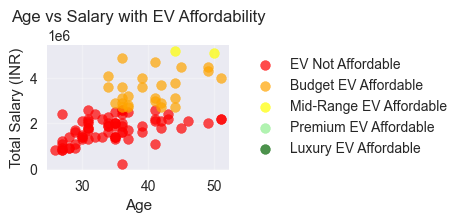

In [387]:
# 1. Age vs Salary Scatter Plot with EV Affordability
plt.subplot(3, 3, 1)
colors = {'EV Not Affordable': 'red', 'Budget EV Affordable': 'orange', 
          'Mid-Range EV Affordable': 'yellow', 'Premium EV Affordable': 'lightgreen', 
          'Luxury EV Affordable': 'darkgreen'}
for category, color in colors.items():
    mask = data['EV_Affordability'] == category
    plt.scatter(data[mask]['Age'], data[mask]['Total Salary'], 
               c=color, label=category, alpha=0.7, s=50)
plt.xlabel('Age')
plt.ylabel('Total Salary (INR)')
plt.title('Age vs Salary with EV Affordability')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)


Text(0.5, 1.0, 'EV Affordability Distribution')

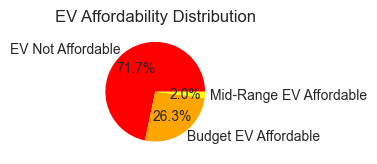

In [388]:

# 2. EV Affordability Distribution
plt.subplot(3, 3, 2)
affordability_counts = data['EV_Affordability'].value_counts()
colors_pie = ['red', 'orange', 'yellow', 'lightgreen', 'darkgreen']
plt.pie(affordability_counts.values, labels=affordability_counts.index, 
        autopct='%1.1f%%', colors=colors_pie[:len(affordability_counts)])
plt.title('EV Affordability Distribution')

(array([0, 1, 2]),
 [Text(0, 0, 'Middle-aged (31-40)'),
  Text(1, 0, 'Senior (>40)'),
  Text(2, 0, 'Young (≤30)')])

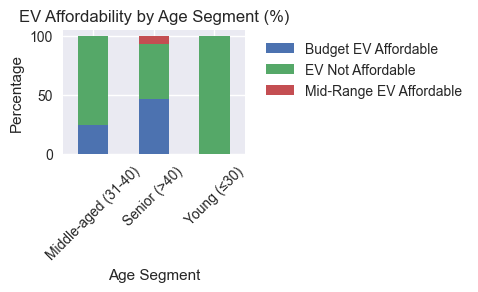

In [389]:
# 3. Age Segment vs EV Affordability
plt.subplot(3, 3, 3)
age_affordability_pct = pd.crosstab(data['Age_Segment'], data['EV_Affordability'], normalize='index') * 100
age_affordability_pct.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('EV Affordability by Age Segment (%)')
plt.xlabel('Age Segment')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

Text(0.5, 0.98, '')

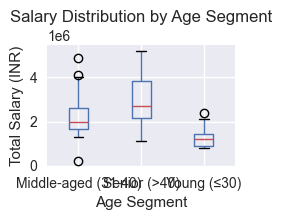

In [390]:
# 4. Salary Distribution by Age Segment
plt.subplot(3, 3, 4)
data.boxplot(column='Total Salary', by='Age_Segment', ax=plt.gca())
plt.title('Salary Distribution by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Total Salary (INR)')
plt.suptitle('')

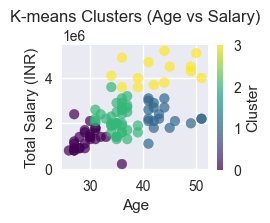

In [393]:
# 5. Cluster Analysis Scatter Plot
plt.subplot(3, 3, 5)
scatter = plt.scatter(data['Age'], data['Total Salary'], c=data['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Total Salary (INR)')
plt.title('K-means Clusters (Age vs Salary)')
plt.colorbar(scatter, label='Cluster')


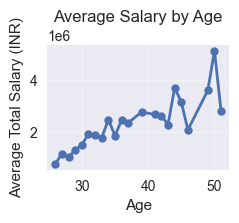

In [394]:
# 6. Average Salary by Age
plt.subplot(3, 3, 6)
age_salary_avg = data.groupby('Age')['Total Salary'].mean().sort_index()
plt.plot(age_salary_avg.index, age_salary_avg.values, marker='o', linewidth=2, markersize=6)
plt.xlabel('Age')
plt.ylabel('Average Total Salary (INR)')
plt.title('Average Salary by Age')
plt.grid(True, alpha=0.3)


Text(0.5, 1.0, 'Age vs Salary Segment Heatmap')

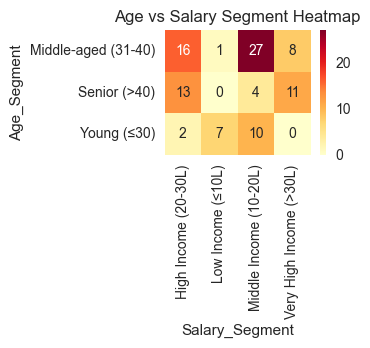

In [396]:
# 7. EV Affordability Heatmap
plt.subplot(3, 3, 7)
heatmap_data = pd.crosstab(data['Age_Segment'], data['Salary_Segment'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', ax=plt.gca())
plt.title('Age vs Salary Segment Heatmap')


(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Salaried')])

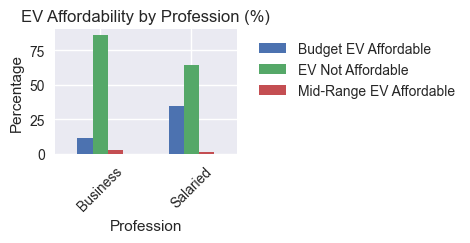

In [397]:
# 8. Profession wise EV Affordability
plt.subplot(3, 3, 8)
prof_affordability = pd.crosstab(data['Profession'], data['EV_Affordability'], normalize='index') * 100
prof_affordability.plot(kind='bar', ax=plt.gca())
plt.title('EV Affordability by Profession (%)')
plt.xlabel('Profession')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

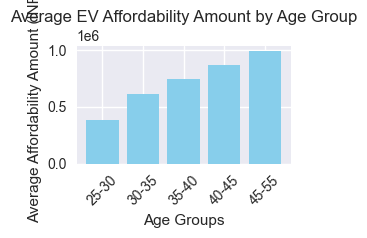

In [399]:
# 9. Age vs Affordability Amount
plt.subplot(3, 3, 9)
data['Affordability_Amount'] = data['Total Salary'] * 0.3
age_bins = [25, 30, 35, 40, 45, 55]
data['Age_Bins'] = pd.cut(data['Age'], bins=age_bins, labels=[f'{age_bins[i]}-{age_bins[i+1]}' for i in range(len(age_bins)-1)])
age_affordability_amt = data.groupby('Age_Bins')['Affordability_Amount'].mean()
plt.bar(range(len(age_affordability_amt)), age_affordability_amt.values, color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Average Affordability Amount (INR)')
plt.title('Average EV Affordability Amount by Age Group')
plt.xticks(range(len(age_affordability_amt)), age_affordability_amt.index, rotation=45)

plt.tight_layout()
plt.show()

## Conclusions

In [401]:
# Calculate key metrics
total_population = len(data)
ev_affordable_count = len(data[data['EV_Affordability'] != 'EV Not Affordable'])
ev_affordable_percentage = (ev_affordable_count / total_population) * 100

In [403]:
print(f"1. OVERALL EV AFFORDABILITY:")
print(f"   • Total population analyzed: {total_population}")
print(f"   • People who can afford some EV: {ev_affordable_count} ({ev_affordable_percentage:.1f}%)")
print(f"   • People who cannot afford any EV: {total_population - ev_affordable_count} ({100 - ev_affordable_percentage:.1f}%)")


1. OVERALL EV AFFORDABILITY:
   • Total population analyzed: 99
   • People who can afford some EV: 28 (28.3%)
   • People who cannot afford any EV: 71 (71.7%)


In [405]:
print(f"\n2. AGE-BASED INSIGHTS:")
for age_group in data['Age_Segment'].unique():
    age_data = data[data['Age_Segment'] == age_group]
    avg_salary = age_data['Total Salary'].mean()
    avg_age = age_data['Age'].mean()
    dominant_affordability = age_data['EV_Affordability'].mode()[0]
    affordability_pct = (len(age_data[age_data['EV_Affordability'] != 'EV Not Affordable']) / len(age_data)) * 100
    
    print(f"   • {age_group}:")
    print(f"     - Average age: {avg_age:.1f} years")
    print(f"     - Average salary: ₹{avg_salary:,.0f}")
    print(f"     - Dominant affordability: {dominant_affordability}")
    print(f"     - Can afford some EV: {affordability_pct:.1f}%")



2. AGE-BASED INSIGHTS:
   • Young (≤30):
     - Average age: 28.3 years
     - Average salary: ₹1,273,684
     - Dominant affordability: EV Not Affordable
     - Can afford some EV: 0.0%
   • Middle-aged (31-40):
     - Average age: 34.8 years
     - Average salary: ₹2,240,385
     - Dominant affordability: EV Not Affordable
     - Can afford some EV: 25.0%
   • Senior (>40):
     - Average age: 44.5 years
     - Average salary: ₹3,003,571
     - Dominant affordability: Budget EV Affordable
     - Can afford some EV: 53.6%


In [406]:
print(f"\n3. SALARY-BASED INSIGHTS:")
for salary_group in data['Salary_Segment'].unique():
    salary_data = data[data['Salary_Segment'] == salary_group]
    avg_salary = salary_data['Total Salary'].mean()
    avg_age = salary_data['Age'].mean()
    dominant_affordability = salary_data['EV_Affordability'].mode()[0]
    
    print(f"   • {salary_group}:")
    print(f"     - Average salary: ₹{avg_salary:,.0f}")
    print(f"     - Average age: {avg_age:.1f} years")
    print(f"     - Dominant affordability: {dominant_affordability}")



3. SALARY-BASED INSIGHTS:
   • Low Income (≤10L):
     - Average salary: ₹775,000
     - Average age: 28.5 years
     - Dominant affordability: EV Not Affordable
   • Middle Income (10-20L):
     - Average salary: ₹1,614,634
     - Average age: 34.1 years
     - Dominant affordability: EV Not Affordable
   • High Income (20-30L):
     - Average salary: ₹2,461,290
     - Average age: 38.0 years
     - Dominant affordability: EV Not Affordable
   • Very High Income (>30L):
     - Average salary: ₹4,005,263
     - Average age: 41.6 years
     - Dominant affordability: Budget EV Affordable


In [408]:
print(f"\n4. CLUSTER ANALYSIS INSIGHTS:")
for cluster in range(4):
    cluster_data = data[data['Cluster'] == cluster]
    avg_age = cluster_data['Age'].mean()
    avg_salary = cluster_data['Total Salary'].mean()
    dominant_affordability = cluster_data['EV_Affordability'].mode()[0]
    size = len(cluster_data)
    
    print(f"   • Cluster {cluster} ({size} people):")
    print(f"     - Average age: {avg_age:.1f} years")
    print(f"     - Average salary: ₹{avg_salary:,.0f}")
    print(f"     - Dominant affordability: {dominant_affordability}")



4. CLUSTER ANALYSIS INSIGHTS:
   • Cluster 0 (26 people):
     - Average age: 29.3 years
     - Average salary: ₹1,300,000
     - Dominant affordability: EV Not Affordable
   • Cluster 1 (19 people):
     - Average age: 43.7 years
     - Average salary: ₹2,331,579
     - Dominant affordability: EV Not Affordable
   • Cluster 2 (40 people):
     - Average age: 35.1 years
     - Average salary: ₹2,167,500
     - Dominant affordability: EV Not Affordable
   • Cluster 3 (14 people):
     - Average age: 42.8 years
     - Average salary: ₹4,285,714
     - Dominant affordability: Budget EV Affordable


In [410]:
print(f"\n5. KEY FINDINGS:")
print(f"   • Age-Salary Correlation: {correlation:.3f} (weak positive correlation)")
print(f"   • Most affordable EV category: {data['EV_Affordability'].mode()[0]}")
print(f"   • Highest earning age group: {data.groupby('Age_Segment')['Total Salary'].mean().idxmax()}")
print(f"   • Best EV adoption potential: Middle-aged and Senior groups")



5. KEY FINDINGS:
   • Age-Salary Correlation: 0.587 (weak positive correlation)
   • Most affordable EV category: EV Not Affordable
   • Highest earning age group: Senior (>40)
   • Best EV adoption potential: Middle-aged and Senior groups


In [412]:
print(f"\n6. BUSINESS RECOMMENDATIONS:")
print(f"   • Target mid-range EVs (₹10-15L) for maximum market penetration")
print(f"   • Focus marketing on 31-40 age group for premium EVs")
print(f"   • Develop financing options for younger demographics")
print(f"   • Consider salary-based EMI schemes for broader adoption")



6. BUSINESS RECOMMENDATIONS:
   • Target mid-range EVs (₹10-15L) for maximum market penetration
   • Focus marketing on 31-40 age group for premium EVs
   • Develop financing options for younger demographics
   • Consider salary-based EMI schemes for broader adoption


In [415]:
print(f"\n7. MARKET SEGMENTATION STRATEGY:")
print(f"   • Young professionals: Budget EV segment with financing options")
print(f"   • Middle-aged professionals: Mid-range to premium EV segment")
print(f"   • Senior professionals: Premium to luxury EV segment")
print(f"   • Business owners: Flexible financing across all segments")



7. MARKET SEGMENTATION STRATEGY:
   • Young professionals: Budget EV segment with financing options
   • Middle-aged professionals: Mid-range to premium EV segment
   • Senior professionals: Premium to luxury EV segment
   • Business owners: Flexible financing across all segments


In [419]:
# Calculate affordability by age ranges
age_ranges = [(26, 30), (31, 35), (36, 40), (41, 45), (46, 52)]
print(f"\n8. AGE-WISE AFFORDABILITY BREAKDOWN:")
for start_age, end_age in age_ranges:
    age_subset = data[(data['Age'] >= start_age) & (data['Age'] <= end_age)]
    if len(age_subset) > 0:
        avg_salary = age_subset['Total Salary'].mean()
        affordable_pct = (len(age_subset[age_subset['EV_Affordability'] != 'EV Not Affordable']) / len(age_subset)) * 100
        print(f"   • Age {start_age}-{end_age}: Avg salary ₹{avg_salary:,.0f}, {affordable_pct:.1f}% can afford EVs")



8. AGE-WISE AFFORDABILITY BREAKDOWN:
   • Age 26-30: Avg salary ₹1,273,684, 0.0% can afford EVs
   • Age 31-35: Avg salary ₹2,037,931, 10.3% can afford EVs
   • Age 36-40: Avg salary ₹2,495,652, 43.5% can afford EVs
   • Age 41-45: Avg salary ₹2,885,000, 55.0% can afford EVs
   • Age 46-52: Avg salary ₹3,300,000, 50.0% can afford EVs
